# Hotel Reviews EDA
[Dataset Link](https://www.kaggle.com/datasets/datafiniti/hotel-reviews?select=7282_1.csv)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

## Data Loading

In [2]:
data = pd.read_csv("../Storage/Data/7282_1.csv")
print(f"Data Shape:{data.shape}\n")
data.sample(3)


Data Shape:(35912, 19)



,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
3421,2855 Main St,Hotels,Irvine,US,33.679710,-117.837279,Residence Inn By Marriott Irvine John Wayne Ai...,92614,CA,2015-10-15T00:00:00Z,2016-10-30T21:45:19Z,NaN,NaN,5.0,We stayed in here for two weeks. all was great...,Special trip,NaN,Tjammal,NaN
6944,5610 Vineland Rd,Hotels,Orlando,US,28.482007,-81.455546,Extended Stay America - Orlando Theme Parks - ...,32819,FL,2015-03-06T00:00:00Z,2016-11-03T15:09:53Z,NaN,NaN,4.0,I was very surprised how big the room was and ...,Shockingly surprised,Carthage,Bernice,MO
26009,11900 N W Plaza Cir,Hotels,Kansas City,US,39.309014,-94.682600,Super 8 Kansas City Airport,64153,MO,2016-04-30T00:00:00Z,2016-11-16T04:02:09Z,NaN,NaN,4.0,"I thought it was a decent hotel, they were und...",Terrible,NaN,A Traveler,NaN


## Data Cleaning

In [3]:
hotels = data[data["categories"] == "Hotels"]
print(f"Data Filtered By Category Shape:{hotels.shape}")
hotels.sample(1)

Data Filtered By Category Shape:(21420, 19)


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
18097,36750 Us Highway 19 N,Hotels,Palm Harbor,US,28.10667,-82.739915,Innisbrook,34684,FL,2016-07-15T00:00:00Z,2016-11-15T22:28:01Z,NaN,NaN,5.0,"Stan, one of the shuttle drivers, was great! A...",the beach shuttle was so convenient!,NaN,Heather H.,NaN


In [4]:
hotels.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [5]:
# check columns that have missing values
hotels.isna().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   34
longitude                  34
name                        0
postalCode                 55
province                    0
reviews.date               25
reviews.dateAdded           0
reviews.doRecommend     21420
reviews.id              21420
reviews.rating             50
reviews.text               16
reviews.title             191
reviews.userCity        13967
reviews.username           25
reviews.userProvince    13537
dtype: int64

In [6]:
# Needed columns that contains reviews values
columns_to_use = [
    'reviews.text', 'reviews.title'
]

In [7]:
hotels[columns_to_use].isna().sum()

reviews.text      16
reviews.title    191
dtype: int64

We notice that there are many useless columns for `Sentiment Analysis` task, So we are going to drop them and drop the rows that contains `NaN` values for needed columns (`reviews.text` \& `reviews.title`), which will be negligible (191) in compare with the rest of the data (21420) and don't make a big difference.

In [8]:
# remove any columns out of `columns_to_use` list
# then drop all rows with missing values
reviews = hotels[columns_to_use].dropna()
print(f"Reviews Data Shape:{reviews.shape}")
reviews.sample(1)


Reviews Data Shape:(21227, 2)


,reviews.text,reviews.title
19038,Decent room. Stayed the next night at the Emba...,Average Room. Had Bugs


## Exploratory Data Analysis

In [9]:
hotels['reviews.rating'].dropna().describe()
# hotels[hotels['reviews.rating'] == 10].sample(1)

count    21370.000000
mean         3.664483
std          1.351322
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: reviews.rating, dtype: float64

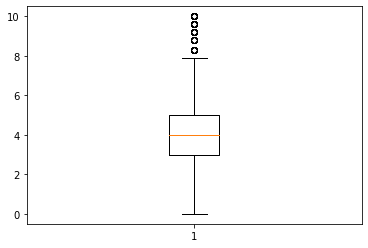

In [10]:
plt.boxplot(hotels['reviews.rating'].dropna())
plt.show()

In [50]:
# combine review.title and review.text, hopfully to add more expressive words
reviews['full_review'] = reviews['reviews.title'] + " | " + reviews['reviews.text']
print(reviews['full_review'].sample(3, random_state=1).values)

['Never Again in This Lifetime | They overbook then lie about it and then have no rooms available at the time they tell you to come back for your room. Horrible experience with this property, will never book with La Quinta again, anywhere.'
 'will consider | The hotel is excellent and clean, I will consider it next time'
 'Loved this place! | The hotel lives up to the pictures. The breakfast was excellent. I especially liked that the front desk staff arranged for my train tickets for me. It is very convenient to the train station too.']


In [51]:
# all chars to lower case
reviews['cleaned'] = reviews['full_review'].apply(lambda review: review.lower())
print(reviews['cleaned'].sample(3, random_state=1).values)


['never again in this lifetime | they overbook then lie about it and then have no rooms available at the time they tell you to come back for your room. horrible experience with this property, will never book with la quinta again, anywhere.'
 'will consider | the hotel is excellent and clean, i will consider it next time'
 'loved this place! | the hotel lives up to the pictures. the breakfast was excellent. i especially liked that the front desk staff arranged for my train tickets for me. it is very convenient to the train station too.']


In [52]:
# remove punctuations
reviews['cleaned'] = reviews['cleaned'].apply(lambda review: re.sub('[%s]' % re.escape(string.punctuation), '', review))
print(reviews['cleaned'].sample(3, random_state=1).values)


['never again in this lifetime  they overbook then lie about it and then have no rooms available at the time they tell you to come back for your room horrible experience with this property will never book with la quinta again anywhere'
 'will consider  the hotel is excellent and clean i will consider it next time'
 'loved this place  the hotel lives up to the pictures the breakfast was excellent i especially liked that the front desk staff arranged for my train tickets for me it is very convenient to the train station too']


In [53]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
reviews['lemmatized'] = reviews['cleaned'].apply(lambda review: ' '.join([token.lemma_ for token in list(nlp(review)) if (token.is_stop==False)]))
print(reviews['lemmatized'].sample(3, random_state=1).values)

['lifetime   overbook lie room available time tell come room horrible experience property book la quinta'
 'consider   hotel excellent clean consider time'
 'love place   hotel live picture breakfast excellent especially like desk staff arrange train ticket convenient train station']


In [54]:
# Removing extra spaces
reviews['lemmatized'] = reviews['lemmatized'].apply(lambda review: re.sub(' +',' ',review))
print(reviews['lemmatized'].sample(3, random_state=1).values)


['lifetime overbook lie room available time tell come room horrible experience property book la quinta'
 'consider hotel excellent clean consider time'
 'love place hotel live picture breakfast excellent especially like desk staff arrange train ticket convenient train station']


In [73]:
# Save `reviews` & `hotels` dataframes as CSV
hotels.to_csv('../Storage/Data/Hotels.csv', index=False)
reviews.to_csv('../Storage/Data/Reviews.csv', index=False)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer


def term_document_matrix(docs, **kwargs):
    ''' create a Term-Document-Matrix
        with **kwargs you can pass arguments of CountVectorizer
    '''

    # initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    tdm = vectorizer.fit_transform(docs)

    return tdm.T, vectorizer.get_feature_names()


reviews_dtm, word_columns = term_document_matrix(reviews.lemmatized)
reviews_dtm.shape


(27221, 21227)

In [104]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import numpy as np

# Function for generating word clouds


def generate_wordcloud(data, title):
    wc = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title, 60)), fontsize=13)
    plt.show()


# # Transposing document term matrix
#  = reviews_dtm.transpose()
sorted(np.array(reviews_dtm[0]))
# Plotting word cloud for each product
# for index, word in enumerate(word_columns):
#     tmp = np.array(reviews_dtm[index])
#     generate_wordcloud(reversed(tmp), word)


TypeError: iteration over a 0-d array